# 1 - Import Packages

In [174]:
# Import packages
### YOUR CODE HERE ###

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [175]:
df = pd.read_csv('/content/HR_comma_sep.csv')

# 2 - EDA

## 2.1 - Overview

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [177]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

*   satisfaction_level: Trung bình 61% - Min 9%
*   last_evaluation: Trung bình 71% - Min 36%
*   number_project: Trung bình 3.8 dự án - Min 2 dự án
*   average_montly_hours: Trung bình 201 giờ (... giờ/ngày) - Giả sử làm từ thứ 2 - 6 - Min 96 giờ
*   time_spend_company: Trung bình 3.49 năm - Min 2 năm
*   Work_accident: Trung bình 11% - Min 0%
*   left: Trung bình 23% - Min 0%
*   promotion_last_5years: Trung bình 21% - Min 0%
Không có có giá trị null ở dòng/cột nào.



In [178]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [179]:
df.duplicated().sum()

3008

Có 3008 giá trị trùng - Cân nhắc có nên dùng df.drop_duplicates() không

In [180]:
df1 = df.drop_duplicates()

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [182]:
df1.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          11991.000000        11991.000000   11991.000000  11991.000000   
mean             200.473522            3.364857       0.154282      0.166041   
std               48.727813            1.330240       0.361234      0.372133   
min               96.000000            2.000000       0.000000      0.000000   
25%              157.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              243.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

## 2.2 - Check Outlier

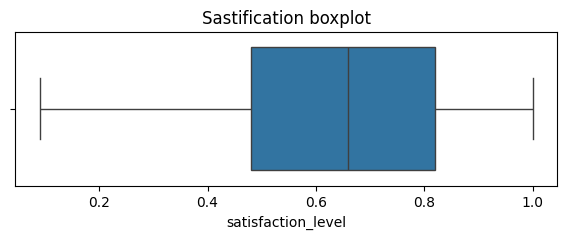

In [183]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df1['satisfaction_level'])
plt.title('Sastification boxplot')
plt.show()

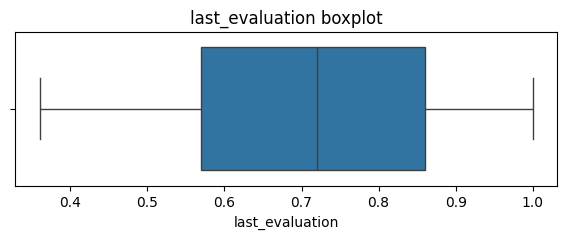

In [184]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df1['last_evaluation'])
plt.title('last_evaluation boxplot')
plt.show()

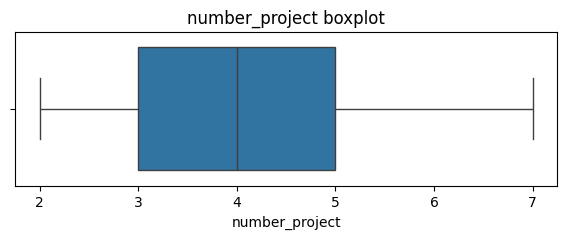

In [185]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df1['number_project'])
plt.title('number_project boxplot')
plt.show()

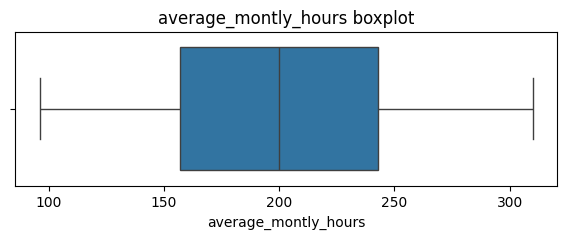

In [186]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df1['average_montly_hours'])
plt.title('average_montly_hours boxplot')
plt.show()


Các Boxplot ở trên đều không có Outlier

Các Boxplot bên dưới có Outlier

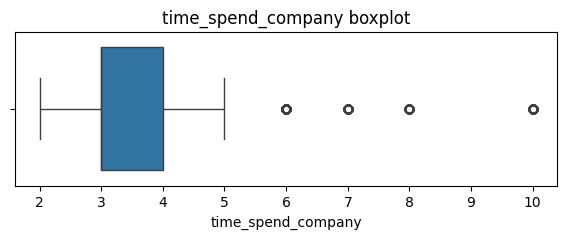

In [187]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df1['time_spend_company'])
plt.title('time_spend_company boxplot')
plt.show()


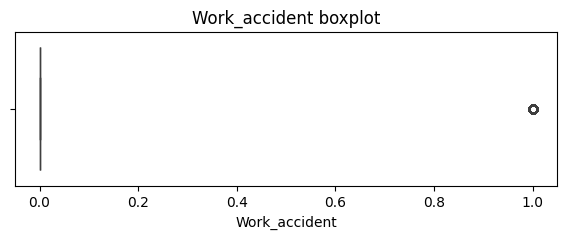

In [188]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df1['Work_accident'])
plt.title('Work_accident boxplot')
plt.show()


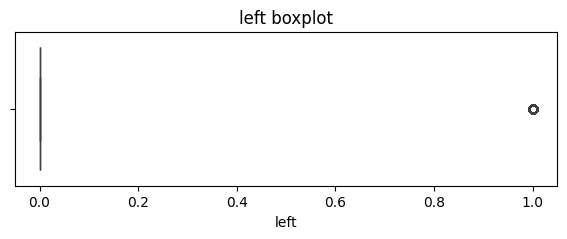

In [189]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df1['left'])
plt.title('left boxplot')
plt.show()


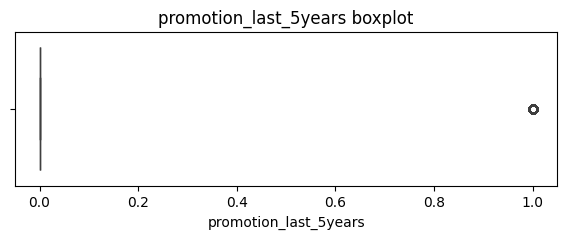

In [190]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df1['promotion_last_5years'])
plt.title('promotion_last_5years boxplot')
plt.show()


Điều tra chi tiết hơn về outlier ở time_spend_company (Những bản ghi có giờ làm ở công ty lớn hơn 5)

In [191]:
(df1["time_spend_company"]>5).sum()*100/df1["time_spend_company"].sum()

2.0422325765837215

Tỷ trọng Outlier là 2%, không đáng kể. Tiếp tục điều tra chi tiết hơn về dataset

## 2.3 - Detailed EDA

### 2.3.1 - Kiểm tra số lượng nhân sự theo các chỉ tiêu

In [192]:
# Check số lượng nhân sự theo lương
df1['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [193]:
# Check tỷ trọng nhân sự theo lương
df1['salary'].value_counts(normalize = True)*100

salary
low       47.869235
medium    43.874573
high       8.256192
Name: proportion, dtype: float64

In [194]:
# Check số lượng nhân sự theo phòng ban
df1['Department'].value_counts()

Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [195]:
# Check tỷ trọng nhân sự theo phòng ban
df1['Department'].value_counts(normalize = True)*100

Department
sales          27.011926
technical      18.714036
support        15.186390
IT              8.139438
RandD           5.787674
product_mng     5.720957
marketing       5.612543
accounting      5.178884
hr              5.012092
management      3.636060
Name: proportion, dtype: float64

Top 3 phòng có nhiều nhân sự nhất: Sales - Technical - Support. Điều tra thêm về sự biến động nhân sự của 3 phòng ban này.

In [196]:
# Check số lượng nhân sự ở lại và nghỉ việc (0 - ở lại, 1 - Nghỉ)
df1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [197]:
# Check tỷ trọng nhân sự ở lại và nghỉ việc (0 - ở lại, 1 - Nghỉ)
df1['left'].value_counts(normalize = True)*100

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64

Tỷ trọng số người nghỉ việc là 16%

In [198]:
# Check số lượng nhân sự ở lại/nghỉ việc theo phòng ban
print(df1.groupby(['Department', 'left']).size())

Department   left
IT           0        818
             1        158
RandD        0        609
             1         85
accounting   0        512
             1        109
hr           0        488
             1        113
management   0        384
             1         52
marketing    0        561
             1        112
product_mng  0        576
             1        110
sales        0       2689
             1        550
support      0       1509
             1        312
technical    0       1854
             1        390
dtype: int64


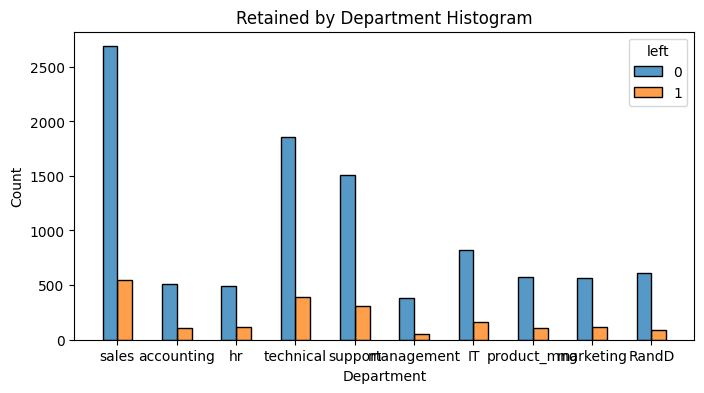

In [199]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['Department'], hue=df1['left'], multiple='dodge', shrink=0.5)
plt.title('Retained by Department Histogram')
plt.show()

3 phòng ban có lượng nhân viên lớn nhất: Sales - Technical - Support cũng là 3 phòng ban có lượng nhân viên nghỉ nhiều nhất

Điều tra thêm về các chỉ số khác liên quan như độ thỏa mãn, số giờ làm,... với biến trạng thái rời bỏ

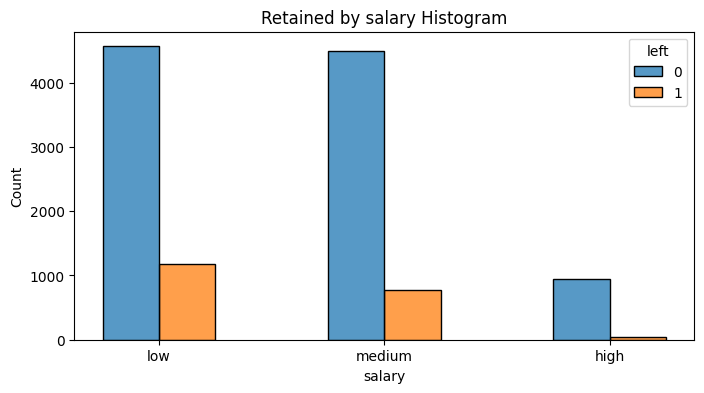

In [200]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['salary'], hue=df1['left'], multiple='dodge', shrink=0.5)
plt.title('Retained by salary Histogram')
plt.show()

Mức lương thấp và trung bình nhân viên sẽ có xu hướng nghỉ việc hơn

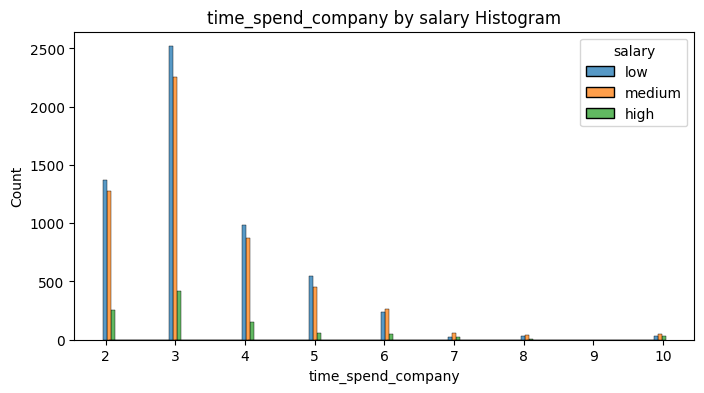

In [201]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['time_spend_company'], hue=df1['salary'], multiple='dodge', shrink=2)
plt.title('time_spend_company by salary Histogram')
plt.show()

Mức lương của những người đi làm dưới 5 năm chủ yếu là mức lương thấp, sau đó đến mức lương trung bình

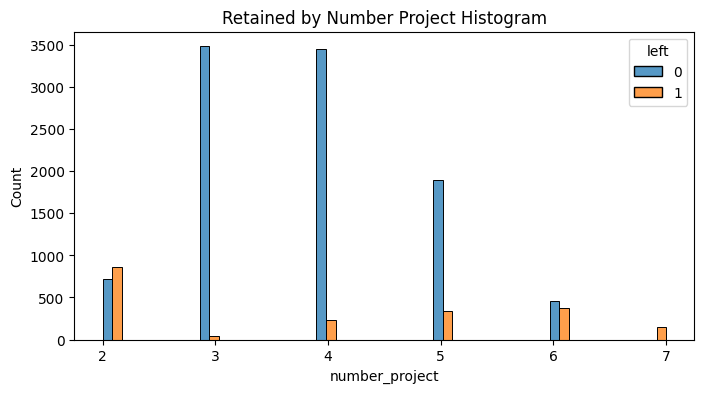

In [202]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['number_project'], hue=df1['left'], multiple='dodge', shrink=1)
plt.title('Retained by Number Project Histogram')
plt.show()

Số người càng làm ít dự án hơn (<3) thì sẽ có khả năng nghỉ việc cao hơn. Hoặc làm quá nhiều dự án (>4)

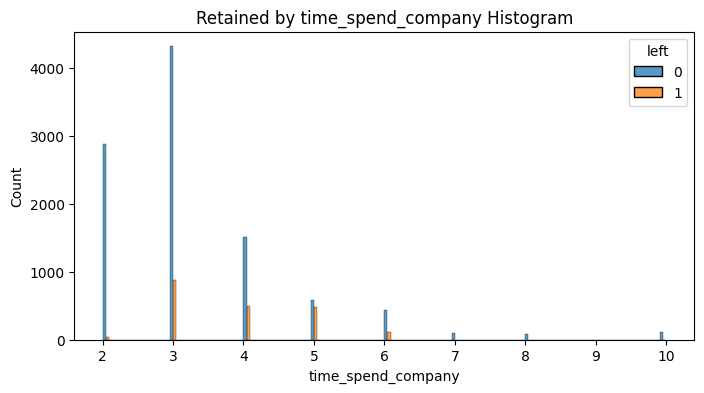

In [203]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['time_spend_company'], hue=df1['left'], multiple='dodge', shrink=1)
plt.title('Retained by time_spend_company Histogram')
plt.show()

Thời gian nhiệm kỳ trung bình công ty từ 3 năm trở lên nhân viên có xu hướng nghỉ việc nhiều hơn

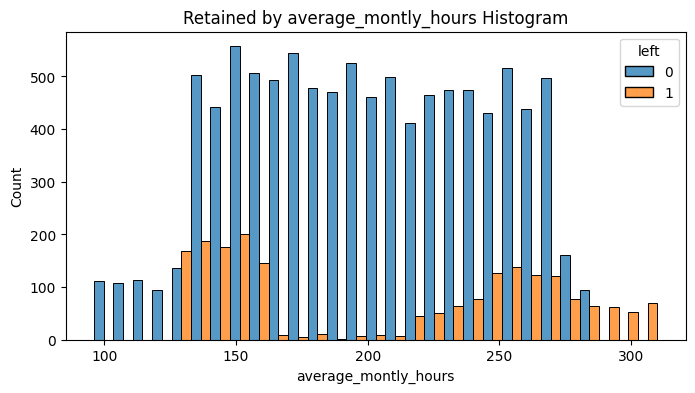

In [204]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['average_montly_hours'], hue=df1['left'], multiple='dodge', shrink=1)
plt.title('Retained by average_montly_hours Histogram')
plt.show()

Nhân viên làm việc trong khoảng từ 130 - 160 giờ/tháng hoặc từ sát 250 giờ/tháng trở lên có xu hướng nghỉ việc nhiều hơn
Mean: 200 giờ/tháng

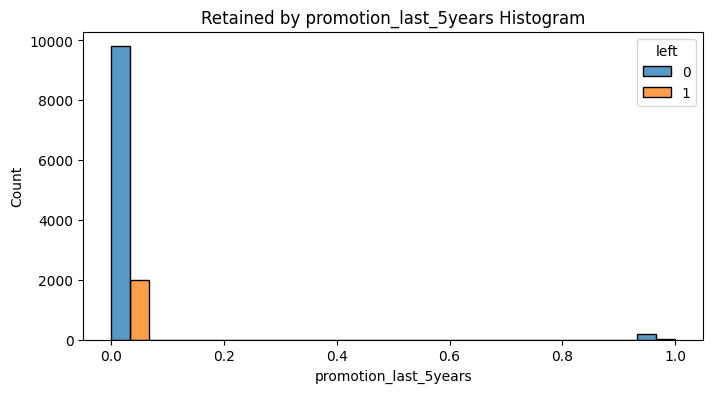

In [205]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['promotion_last_5years'], hue=df1['left'], multiple='dodge')
plt.title('Retained by promotion_last_5years Histogram')
plt.show()

Nhân viên được thăng chức trong vòng 5 năm có xu hướng không nghỉ việc

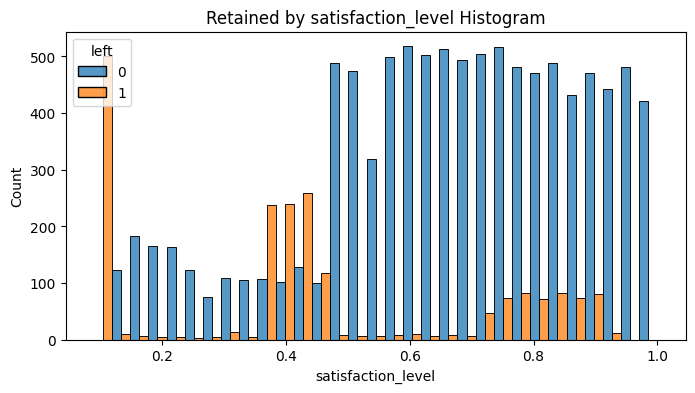

In [206]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['satisfaction_level'], hue=df1['left'], multiple='dodge',shrink=1)
plt.title('Retained by satisfaction_level Histogram')
plt.show()

Độ thỏa đáng càng thấp khả năng nhân viên nghỉ việc càng cao

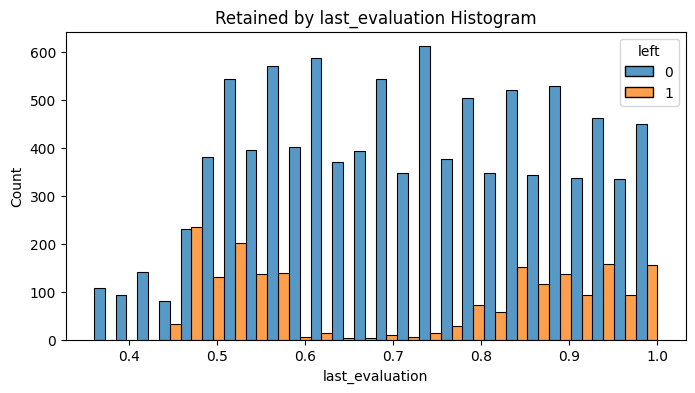

In [207]:
# Histogram
plt.figure(figsize=(8,4))
ax = sns.histplot(x=df1['last_evaluation'], hue=df1['left'], multiple='dodge',shrink=1)
plt.title('Retained by last_evaluation Histogram')
plt.show()

Lần đánh giá cuối cùng dưới 0.6 nhân viên có xu hướng nghỉ việc nhiều hơn

Tạo Dummy Varible để vẽ ma trận tương quan (Correlation Maps)

In [208]:
df1["salary_d"] = df1["salary"].replace({'low':0,'medium':1,'high':2})
df1["department_d"] = df1["Department"].replace({'sales':1, 'technical':2,'support':3,'IT':4,'RandD':5,'product_mng':6,'marketing':7,'accounting':8,'hr':9,'management':10})

<ipython-input-208-1a683e857e76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["salary_d"] = df1["salary"].replace({'low':0,'medium':1,'high':2})
<ipython-input-208-1a683e857e76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["department_d"] = df1["Department"].replace({'sales':1, 'technical':2,'support':3,'IT':4,'RandD':5,'product_mng':6,'marketing':7,'accounting':8,'hr':9,'management':10})


In [209]:
df1 = df1.drop(columns=["salary","Department"])
df1.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary_d  \
0                   3              0     1                      0         0   
1                   6              0     1                      0         1   
2                   4              0     1                      0         1   
3                   5              0     1                      0         0   
4                   3              0     1                      0         0   

   department_d  
0             1  
1             1  
2             1  
3             1  
4             1

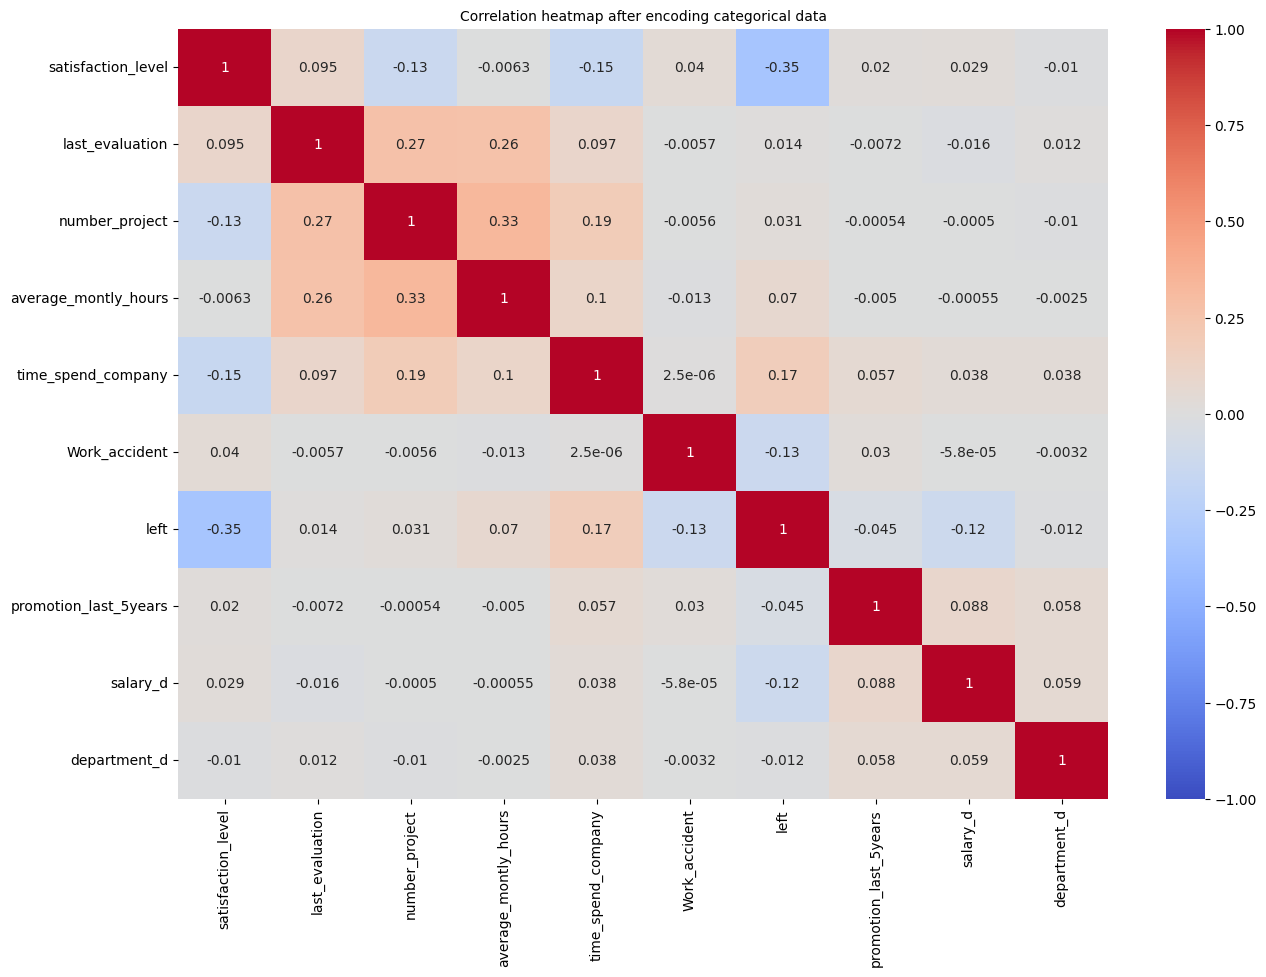

In [210]:
# Calculate correlation and plot heatmap
plt.figure(figsize=(15,10))
corr_matrix = df1.corr(method='pearson')
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap after encoding categorical data', fontsize=10)
plt.show()

Loại bỏ outlier xem kết quả tương quan có thay đổi nhiều không (Time on Company)

In [211]:
df1= df1[df1["time_spend_company"]<6]
df1.describe()

satisfaction_level  last_evaluation  number_project  \
count        11167.000000     11167.000000    11167.000000   
mean             0.631944         0.715901        3.786066   
std              0.239064         0.167595        1.164198   
min              0.090000         0.360000        2.000000   
25%              0.490000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          11167.000000        11167.000000   11167.000000  11167.000000   
mean             200.144533            3.109161       0.152413      0.168532   
std               48.563047            0.899277       0.359437      0.374355   
min               96.000000            2.000000       0.000000      0.000000   
25%              157.000000            2.000000       0.000000      0.000000   
50%              199.000000            3.000000       0.000000      0.000000   
75%              243.000000            4.000000       0.000000      0.000000   
max              310.000000            5.000000       1.000000      1.000000   

       promotion_last_5years      salary_d  department_d  
count           11167.000000  11167.000000  11167.000000  
mean                0.014417      0.592997      3.658279  
std                 0.119209      0.632227      2.695848  
min                 0.000000      0.000000      1.000000  
25%                 0.000000      0.000000      1.000000  
50%                 0.000000      1.000000      3.000000  
75%                 0.000000      1.000000      5.000000  
max                 1.000000      2.000000     10.000000

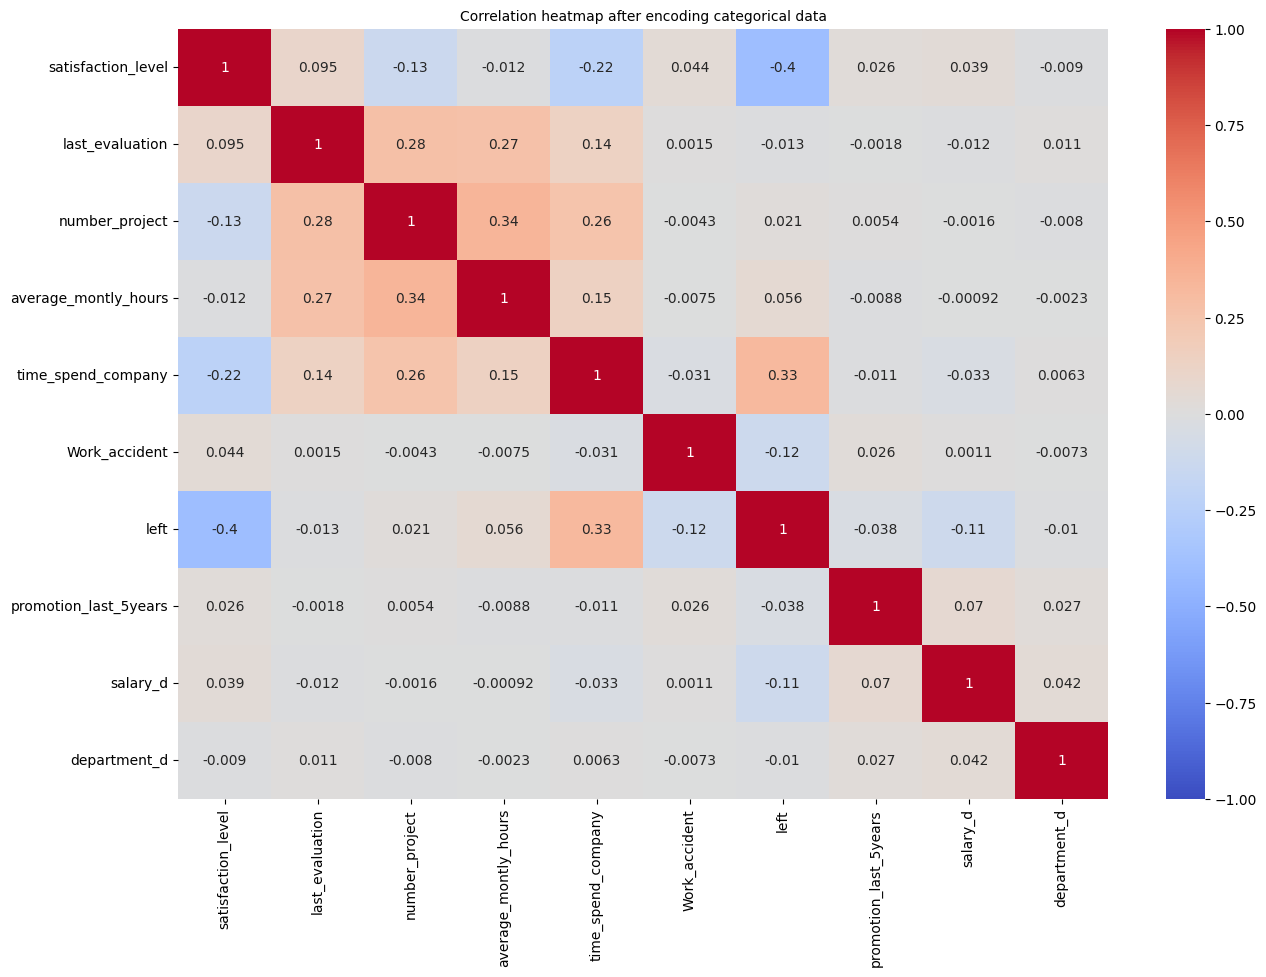

In [212]:
# Calculate correlation and plot heatmap
plt.figure(figsize=(15,10))
corr_matrix = df1.corr(method='pearson')
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap after encoding categorical data', fontsize=10)
plt.show()

Các chỉ số tương quan có thay đổi trong Correlation Heatmap => Loại bỏ Outlier

Các sự tương quan trong Correlation Heatmap:
* Độ thỏa đáng ảnh hưởng bởi khả năng rời bỏ công ty, số lượng dự án, thời gian làm trên công ty (-)
* Lần đánh giá cuối cùng ảnh hưởng bởi số lượng dự án, thời gian làm trung bình hàng tháng (+)
* Số lượng dự án ảnh hưởng bởi lần đánh giá cuối cùng, thời gian làm trung bình hàng tháng, thời gian trên công ty (+)
* Tai nạn lao động ảnh hưởng bởi khả năng rời bỏ công ty (-)



Insight:
* 3 phòng ban có lượng nhân viên lớn nhất: Sales - Technical - Support cũng là 3 phòng ban có lượng nhân viên nghỉ nhiều nhất
* Tỷ trọng nhân viên nghỉ việc là 16%
* Biến time_on_company là biến có Outlier, chiếm 2% trong toàn bộ
dataset
* Mức lương thấp và trung bình nhân viên sẽ có xu hướng nghỉ việc hơn
* Số người càng làm ít dự án hơn (<3) thì sẽ có khả năng nghỉ việc cao hơn. Hoặc làm quá nhiều dự án (>4)
* Nhân viên được thăng chức trong vòng 5 năm có xu hướng không nghỉ việc
* Thời gian nhiệm kỳ trung bình công ty từ 3 năm trở lên nhân viên có xu hướng nghỉ việc nhiều hơn
* Mức lương của những người đi làm dưới 5 năm chủ yếu là mức lương thấp, sau đó đến mức lương trung bình
* Nhân viên làm việc trong khoảng từ 130 - 160 giờ/tháng hoặc từ sát 250 giờ/tháng trở lên có xu hướng nghỉ việc nhiều hơn (Mean: 200 giờ/tháng)
* Độ thỏa đáng càng thấp khả năng nhân viên nghỉ việc càng cao
* Lần đánh giá cuối cùng dưới 0.6 nhân viên có xu hướng nghỉ việc nhiều hơn

Khả năng rời bỏ công ty ảnh hưởng bởi độ thỏa đáng, thời gian trên công ty => Có khả năng nhân viên bỏ công ty vì khả năng quản lý vận hành tệ

### 2.3.2 - Điều tra chi tiết hơn từ Insight 2.3.1

Insight từ phần trước: Khả năng rời bỏ công ty ảnh hưởng bởi độ thỏa đáng, thời gian nhiệm kỳ ở công ty, số giờ làm tại công ty hàng tháng

In [213]:
# Xem lại dataset sau khi loại bỏ outlier
df1.describe()

satisfaction_level  last_evaluation  number_project  \
count        11167.000000     11167.000000    11167.000000   
mean             0.631944         0.715901        3.786066   
std              0.239064         0.167595        1.164198   
min              0.090000         0.360000        2.000000   
25%              0.490000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          11167.000000        11167.000000   11167.000000  11167.000000   
mean             200.144533            3.109161       0.152413      0.168532   
std               48.563047            0.899277       0.359437      0.374355   
min               96.000000            2.000000       0.000000      0.000000   
25%              157.000000            2.000000       0.000000      0.000000   
50%              199.000000            3.000000       0.000000      0.000000   
75%              243.000000            4.000000       0.000000      0.000000   
max              310.000000            5.000000       1.000000      1.000000   

       promotion_last_5years      salary_d  department_d  
count           11167.000000  11167.000000  11167.000000  
mean                0.014417      0.592997      3.658279  
std                 0.119209      0.632227      2.695848  
min                 0.000000      0.000000      1.000000  
25%                 0.000000      0.000000      1.000000  
50%                 0.000000      1.000000      3.000000  
75%                 0.000000      1.000000      5.000000  
max                 1.000000      2.000000     10.000000

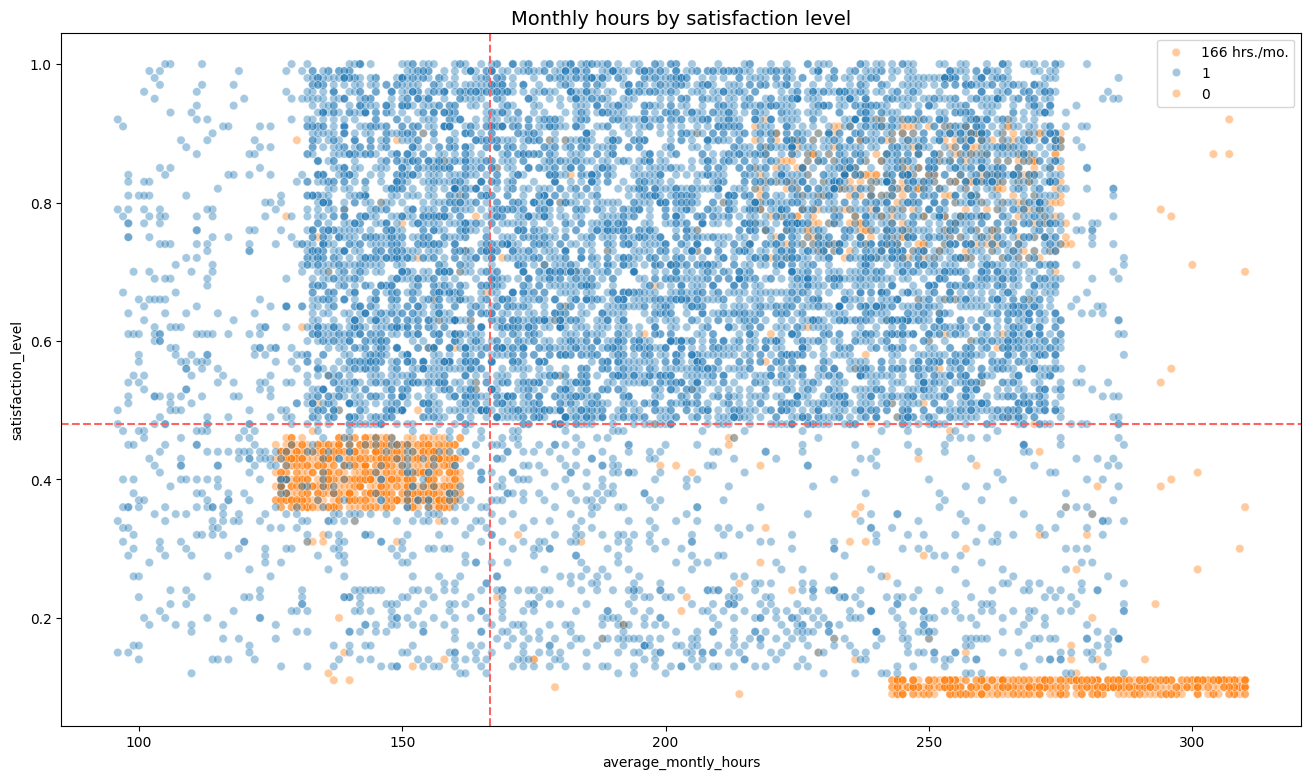

In [214]:
plt.figure(figsize=(16, 9))
sns.scatterplot(df1, x='average_montly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166 hrs./mo.', ls='--')
plt.axhline(y=0.48, color='#ff6361', label='Specific Satisfaction Level', ls='--')
plt.legend(labels=['166 hrs./mo.', '1', '0'])
plt.title('Monthly hours by satisfaction level', fontsize='14');

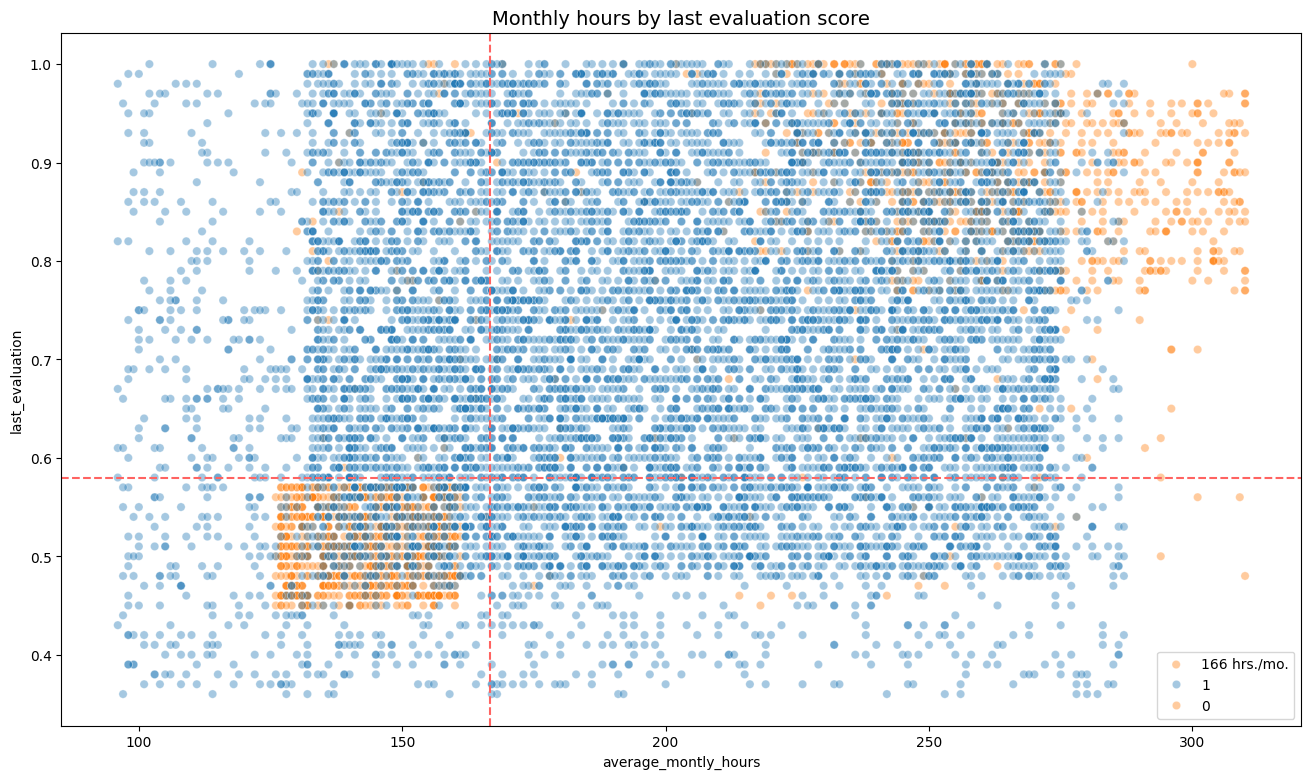

In [215]:
plt.figure(figsize=(16, 9))
sns.scatterplot(df1, x='average_montly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166 hrs./mo.', ls='--')
plt.axhline(y=0.58, color='#ff6361', label='Specific Satisfaction Level', ls='--')
plt.legend(labels=['166 hrs./mo.', '1', '0'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

Khoanh vùng và tính toán lượng tỷ trọng nhân viên rời bỏ theo các tiêu chí vừa vẽ trên Scatter Plot

# 3 - Xây dựng mô hình hồi quy và ML

* Dùng biến Left là biến dự đoán khả năng rời bỏ (Biến Left là biến phụ thuộc -
Categorical) => Sử dụng Hồi quy Logistic
* Các biến khác sẽ được coi là biến độc lập để xây dựng mô hình hồi quy Logistic và ML => Sử dụng mô hình ML Random Forest và

## 3.1 - Xây dựng mô hình hồi quy Logistic

In [216]:
# Tạo bản sao dataset dùng để xây dựng mô hình
df2 = df1.copy()

In [217]:
df2.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   

   time_spend_company  Work_accident  left  promotion_last_5years  salary_d  \
0                   3              0     1                      0         0   
2                   4              0     1                      0         1   
3                   5              0     1                      0         0   
4                   3              0     1                      0         0   
5                   3              0     1                      0         0   

   department_d  
0             1  
2             1  
3             1  
4             1  
5             1

In [218]:
# Gán y cho biến left
y = df2['left']
print(y)

0        1
2        1
3        1
4        1
5        1
        ..
11985    0
11986    0
11987    0
11992    0
11999    0
Name: left, Length: 11167, dtype: int64


In [219]:
# Gán x cho các biến độc lập
x=df2.drop(columns=["left","satisfaction_level"])
print(x)

       last_evaluation  number_project  average_montly_hours  \
0                 0.53               2                   157   
2                 0.88               7                   272   
3                 0.87               5                   223   
4                 0.52               2                   159   
5                 0.50               2                   153   
...                ...             ...                   ...   
11985             0.64               4                   192   
11986             0.50               5                   142   
11987             0.79               4                   229   
11992             0.85               3                   237   
11999             0.73               4                   180   

       time_spend_company  Work_accident  promotion_last_5years  salary_d  \
0                       3              0                      0         0   
2                       4              0                      0         1   


Code về xây dựng mô hình hồi quy ở đây

In [220]:
# Perform the train-test split - train, test, validate (60%,20%,20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [221]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [222]:
pd.Series(model.coef_[0], index=x.columns)

last_evaluation         -1.341818
number_project          -0.214192
average_montly_hours     0.002510
time_spend_company       1.119146
Work_accident           -1.472817
promotion_last_5years   -1.624111
salary_d                -0.530787
department_d            -0.013367
dtype: float64

In [223]:
model.intercept_

array([-3.60541245])

In [224]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.90598377, 0.09401623],
       [0.98844222, 0.01155778],
       [0.98706961, 0.01293039],
       ...,
       [0.96234531, 0.03765469],
       [0.94587828, 0.05412172],
       [0.92551762, 0.07448238]])

In [225]:
y_pred = log_clf.predict(X_test)

In [226]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8180515759312321

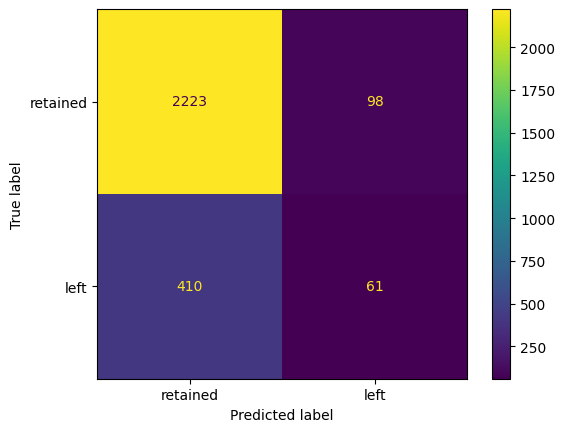

In [227]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['retained', 'left'],
                              )
disp.plot();

In [228]:
# Lưu Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

In [229]:
# Create a classification report
target_labels = ['retained', 'left']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.84      0.96      0.90      2321
        left       0.38      0.13      0.19       471

    accuracy                           0.82      2792
   macro avg       0.61      0.54      0.55      2792
weighted avg       0.77      0.82      0.78      2792



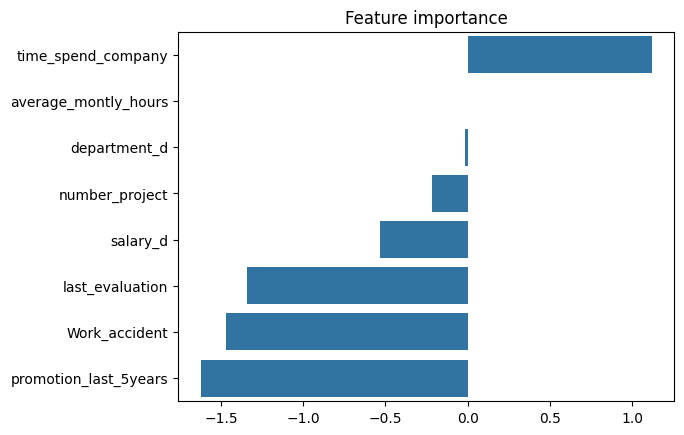

In [230]:
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

Insight:
* Mô hình dự đoán số người ở lại có xu hướng đúng khá cao, trong khi đó dự đoán số người sẽ nghỉ việc thì có xu hướng thấp hơn => Cần cải thiện vì bài toán đang là dự đoán số người nghỉ
* Các yếu tố chính chú ý trong mô hình này: Thời gian nhiệm kỳ tại công ty, lần đánh giá cuối cùng, tai nạn, thăng chức trong vòng 5 năm

## 3.2 - Xây dựng ML

### 3.2.1 - Random Forest

In [231]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [232]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [239]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [240]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 18.6 s, sys: 0 ns, total: 18.6 s
Wall time: 18.7 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [241]:
# Examine best score
rf_cv.best_score_

0.9064592454287922

In [242]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [269]:
rf_results = make_results('RF cv', rf_cv, 'recall')
rf_results

model  precision    recall        F1  accuracy
0  RF cv   0.948263  0.906459  0.926784  0.975881

In [289]:
imp_df = pd.DataFrame(rf_cv.best_estimator_.feature_importances_.T,columns=["importance"],index=list(x.columns))
imp_df = imp_df.sort_values("importance",ascending=False)
imp_df


importance
number_project           0.298286
average_montly_hours     0.261691
last_evaluation          0.231916
time_spend_company       0.183293
department_d             0.014990
salary_d                 0.006900
Work_accident            0.002806
promotion_last_5years    0.000119

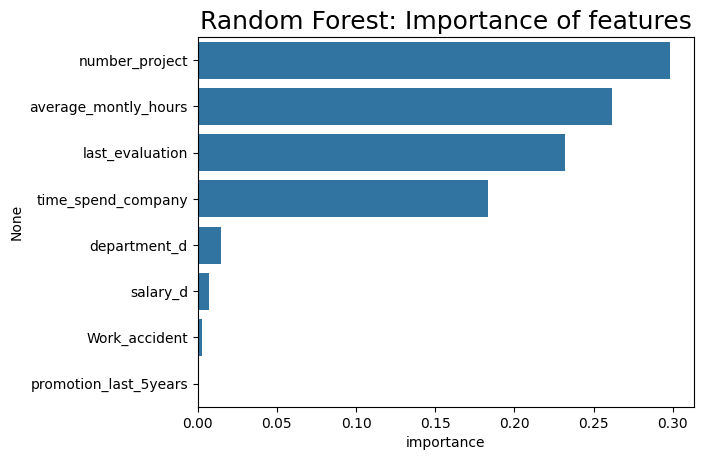

In [290]:
sns.barplot(x=imp_df["importance"],y=imp_df.index)
plt.title("Random Forest: Importance of features",fontsize=18)
plt.show()

### 3.2.2 - Decsion Tree

In [259]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [261]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 5.22 s, sys: 10.4 ms, total: 5.23 s
Wall time: 7.75 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'precision', 'f1', 'roc_auc', 'recall', 'accuracy'})

In [262]:
# Examine best score
tree1.best_score_

0.9647841540442048

In [263]:
# Examine best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [266]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1,'recall')
tree1_cv_results

model  precision    recall        F1  accuracy
0  decision tree cv    0.92492  0.912127  0.918067  0.972538

In [279]:
#tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns=X.columns)
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=x.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

gini_importance
number_project               0.273163
last_evaluation              0.261828
average_montly_hours         0.260072
time_spend_company           0.204491
department_d                 0.000447

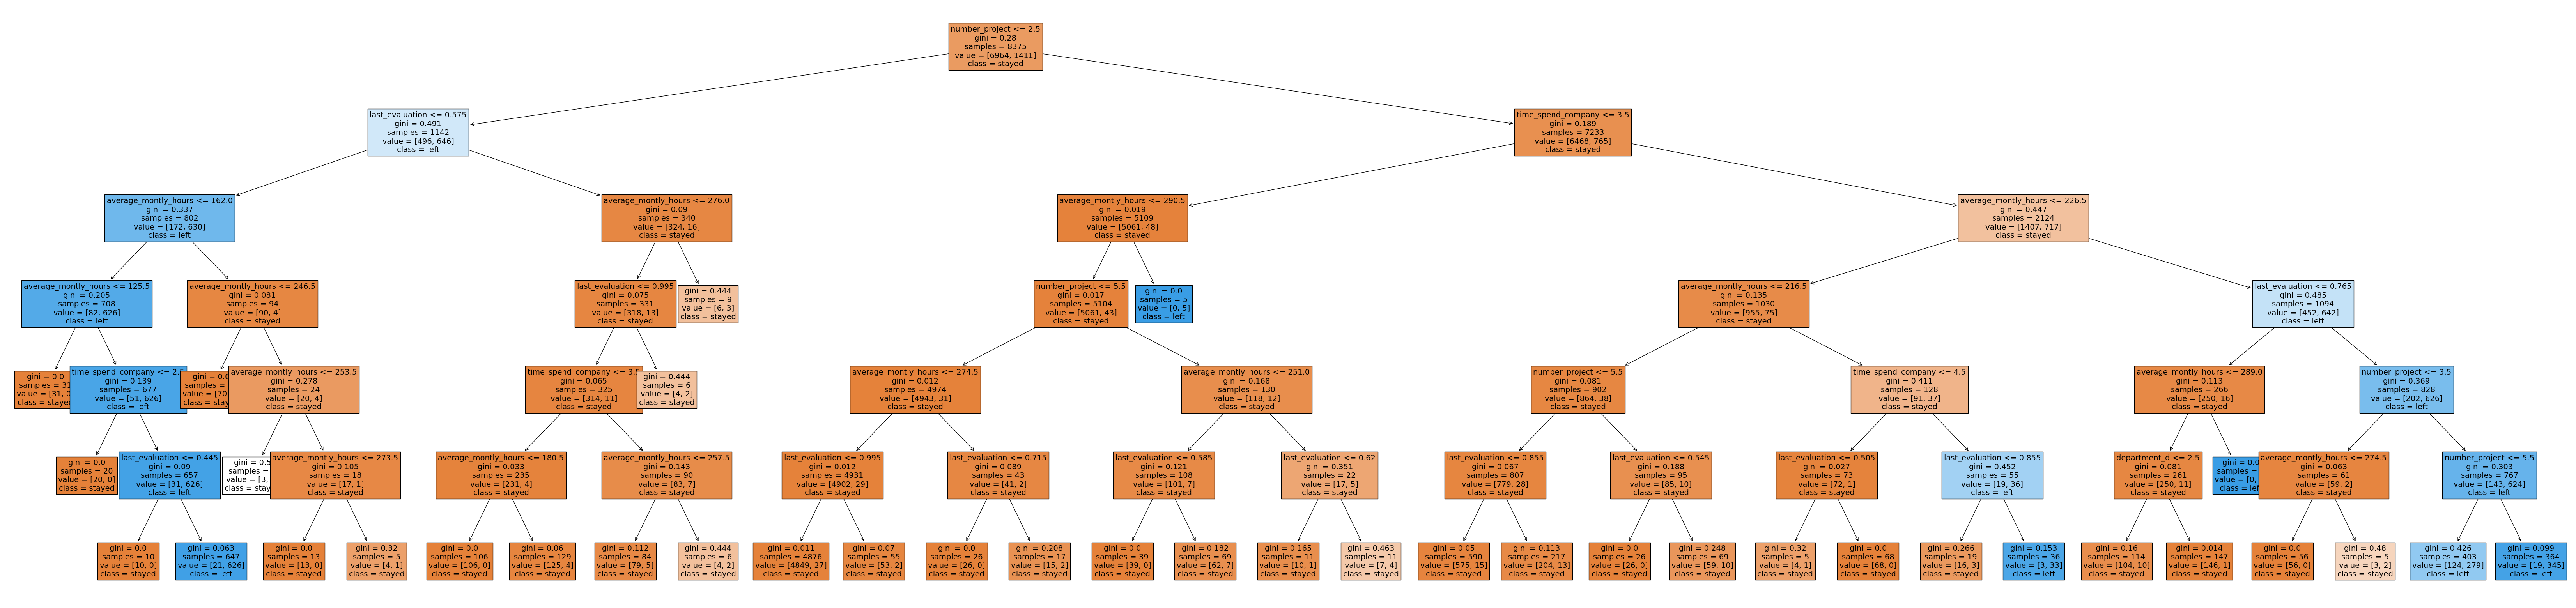

In [277]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=x.columns,
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

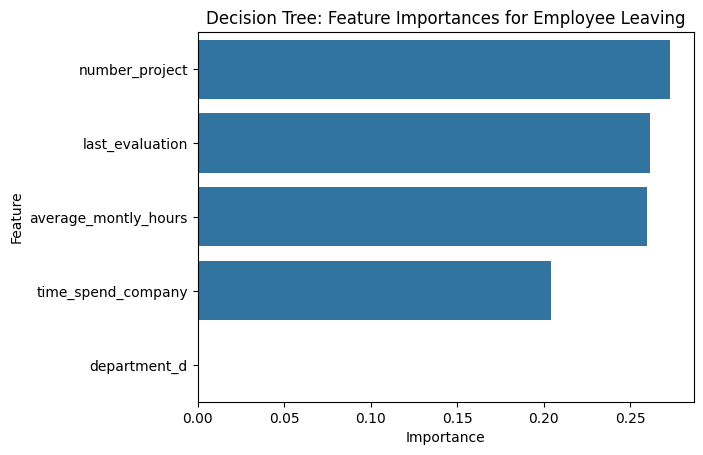

In [280]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### 3.2.3- XGBoost

In [250]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [251]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 27.8 s, sys: 282 ms, total: 28.1 s
Wall time: 22.4 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [252]:
# Examine best score
xgb_cv.best_score_

0.9000812838011847

In [253]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 300}

In [270]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([rf_results,tree1_cv_results, xgb_cv_results], axis=0)
results

model  precision    recall        F1  accuracy
0             RF cv   0.948263  0.906459  0.926784  0.975881
0  decision tree cv   0.924920  0.912127  0.918067  0.972538
0            XGB cv   0.949269  0.900081  0.923900  0.975045

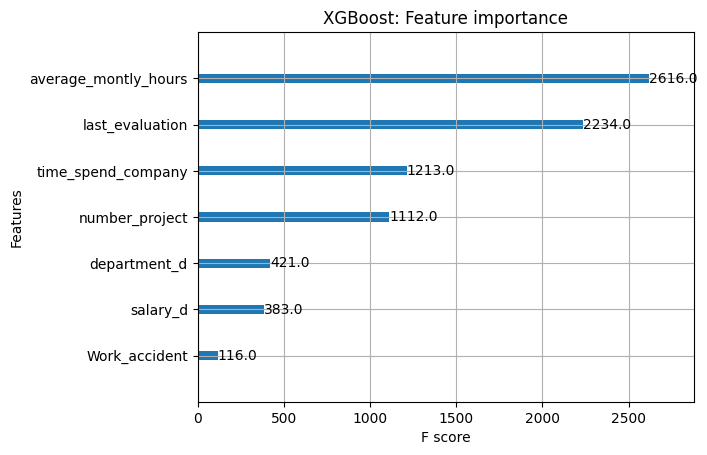

In [271]:
plot_importance(xgb_cv.best_estimator_,title='XGBoost: Feature importance')
plt.show()

# 4 - Kết luận

## 4.1 - Toàn bộ Insight

Các sự tương quan trong Correlation Heatmap:
* Độ thỏa đáng ảnh hưởng bởi khả năng rời bỏ công ty, số lượng dự án, thời gian làm trên công ty (-)
* Lần đánh giá cuối cùng ảnh hưởng bởi số lượng dự án, thời gian làm trung bình hàng tháng (+)
* Số lượng dự án ảnh hưởng bởi lần đánh giá cuối cùng, thời gian làm trung bình hàng tháng, thời gian trên công ty (+)
* Tai nạn lao động ảnh hưởng bởi khả năng rời bỏ công ty (-)



Insight từ EDA:
* 3 phòng ban có lượng nhân viên lớn nhất: Sales - Technical - Support cũng là 3 phòng ban có lượng nhân viên nghỉ nhiều nhất
* Tỷ trọng nhân viên nghỉ việc là 16%
* Biến time_on_company là biến có Outlier, chiếm 2% trong toàn bộ
dataset
* Mức lương thấp và trung bình nhân viên sẽ có xu hướng nghỉ việc hơn
* Số người càng làm ít dự án hơn (<3) thì sẽ có khả năng nghỉ việc cao hơn. Hoặc làm quá nhiều dự án (>4)
* Nhân viên được thăng chức trong vòng 5 năm có xu hướng không nghỉ việc
* Thời gian nhiệm kỳ trung bình công ty từ 3 năm trở lên nhân viên có xu hướng nghỉ việc nhiều hơn
* Mức lương của những người đi làm dưới 5 năm chủ yếu là mức lương thấp, sau đó đến mức lương trung bình
* Nhân viên làm việc trong khoảng từ 130 - 160 giờ/tháng hoặc từ sát 250 giờ/tháng trở lên có xu hướng nghỉ việc nhiều hơn (Mean: 200 giờ/tháng)
* Độ thỏa đáng càng thấp khả năng nhân viên nghỉ việc càng cao
* Lần đánh giá cuối cùng dưới 0.6 nhân viên có xu hướng nghỉ việc nhiều hơn

Khả năng rời bỏ công ty ảnh hưởng bởi độ thỏa đáng, thời gian trên công ty => Có khả năng nhân viên bỏ công ty vì khả năng quản lý vận hành tệ

Insight từ xây dựng mô hình Logistic và ML:
* Cả 3 mô hình đều cho thấy lần đánh giá cuối cùng, thời gian giờ làm việc trong 1 tháng và số dự án tham gia có ảnh hưởng lớn đến vấn đề nhân viên nghỉ việc
* Mô hình Random Forest, XGB có chỉ số accuracy, precision, F1 cao nhất trong khi đó mô hình Decsion Tree có chỉ số recall cao nhất



## 4.2 - Đề xuất

*   Có chính sách lương OT rõ ràng với những người làm quá nhiều dự án. Làm nhiều dự án đồng nghĩa với việc thời gian giờ làm hàng tháng trên công ty sẽ tăng lên dẫn đến quá tải
*   Xem xét tăng lương cho những nhân viên có năng lực vào năm 2, năm 3 để giữ chân nhân viên tiếp tục làm việc
*  Khảo sát điều tra thêm về độ thỏa mãn của nhân viên xem điểm bất cập do quản lý cấp trên hay do sự vận hành không ổn
*  Giới hạn mỗi nhân viên chỉ care tầm 3 dự án để nhân viên có thời gian cân bằng cuộc sống
* Điều tra thêm về 3 phòng ban có nhiều nhân sự nhất để có thể có thêm các chính sách hỗ trợ hoặc thiết lập KPI sao cho hợp lý.
